In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data collection & processing

In [ ]:
1 #load the data from csv file to pandas Dataframe
titanic_data = pd.read_csv('/content/SVMtrain.csv')

In [ ]:
# printing the first 5 rows of the data frame
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [ ]:
#number of rows and columns
titanic_data.shape

(889, 9)

In [ ]:
#getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [ ]:
#check the number of missing values in each column
titanic_data.isnull() .sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Data analysis

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


handling and missing values

In [ ]:
titanic_data = titanic_data.drop(columns='Pclass', axis=1)

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
print(titanic_data['Embarked'].mode())

0    3
Name: Embarked, dtype: int64


In [ ]:
print(titanic_data['Embarked'].mode()[0])

3


In [ ]:
#replacing missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'])

0      3
1      1
2      3
3      3
4      3
      ..
884    3
885    3
886    3
887    1
888    2
Name: Embarked, Length: 889, dtype: int64

In [ ]:
#getting statistics
titanic_data.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


from matplotlib import pyplot as plt
_df_1['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Survived', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='SibSp', y='Parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

Data visualization

In [ ]:
sns.set()

In [ ]:
#finding number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

data of survived and not survived people

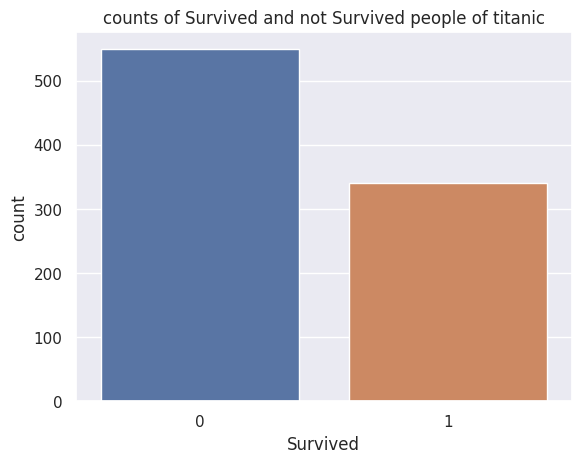

In [ ]:


sns.countplot(x='Survived',data=titanic_data)
plt.xlabel('Survived')
plt.ylabel('count')
plt.title('counts of Survived and not Survived people of titanic')
plt.show()


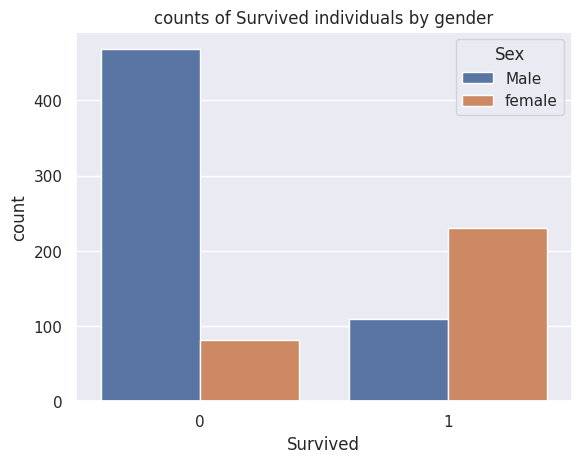

In [ ]:
# counts of male and female survived
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.xlabel('Survived')
plt.ylabel('count')
plt.title('counts of Survived individuals by gender')

plt.show()

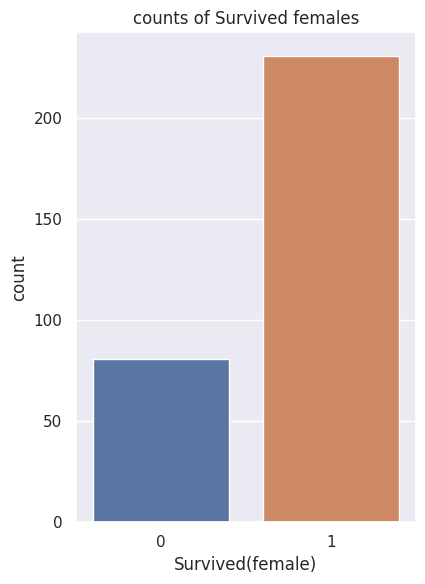

In [ ]:
female_data=titanic_data[titanic_data['Sex']=='female']
male_data=titanic_data[titanic_data['Sex']=='male']

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
sns.countplot(x='Survived',data=female_data)
plt.xlabel('Survived(female)')
plt.ylabel('count')
plt.title('counts of Survived females')

plt.tight_layout()
plt.show()


Encoding the categorial columns

In [ ]:
titanic_data['Sex'].value_counts()

Male      577
female    312
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

3    644
1    168
2     77
Name: Embarked, dtype: int64

In [ ]:
#converting categorial columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,Male,22.0,1,0,7.2500,3
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,1,26.0,0,0,7.9250,3
3,4,1,1,35.0,1,0,53.1000,3
4,5,0,Male,35.0,0,0,8.0500,3


In [ ]:
X=titanic_data.drop(columns=['PassengerId','Fare','Survived'],axis=1)
y=titanic_data['Survived']

In [ ]:
print(X)

      Sex   Age  SibSp  Parch  Embarked
0    Male  22.0      1      0         3
1       1  38.0      1      0         1
2       1  26.0      0      0         3
3       1  35.0      1      0         3
4    Male  35.0      0      0         3
..    ...   ...    ...    ...       ...
884  Male  27.0      0      0         3
885     1  19.0      0      0         3
886     1  60.0      1      2         3
887  Male  26.0      0      0         1
888  Male  32.0      0      0         2

[889 rows x 5 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(889, 5) (711, 5) (178, 5)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(889,) (711,) (178,)


model training
Logistic regression

In [ ]:
model=LogisticRegression()

In [ ]:
cat_cols = X.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(X[cat_cols], drop_first=True)
X[dummies.columns] = dummies
X.drop(cat_cols, axis=1, inplace=True)
X.head()

,Age,SibSp,Parch,Embarked,Sex_Male
0,22.0,1,0,3,1
1,38.0,1,0,1,0
2,26.0,0,0,3,0
3,35.0,1,0,3,0
4,35.0,0,0,3,1


In [ ]:
print(titanic_data['Sex'].unique())

['Male' 1]


In [ ]:
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


In [ ]:
print(titanic_data[titanic_data['Sex'] == 'Male'])

     PassengerId  Survived   Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0  Male  22.0      1      0   7.2500         3
4              5         0  Male  35.0      0      0   8.0500         3
5              6         0  Male  60.0      0      0   8.4583         2
6              7         0  Male  54.0      0      0  51.8625         3
7              8         0  Male   2.0      3      1  21.0750         3
..           ...       ...   ...   ...    ...    ...      ...       ...
881          884         0  Male  28.0      0      0  10.5000         3
882          885         0  Male  25.0      0      0   7.0500         3
884          887         0  Male  27.0      0      0  13.0000         3
887          890         1  Male  26.0      0      0  30.0000         1
888          891         0  Male  32.0      0      0   7.7500         2

[577 rows x 8 columns]


In [ ]:
sex_dummies = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [ ]:
titanic_data = pd.concat([titanic_data, sex_dummies], axis=1)
titanic_data.drop('Sex', axis=1, inplace=True)

In [ ]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

In [ ]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
print(y_train_pred)

[1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1
 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 

In [ ]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1]


In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [ ]:
#feature importance of the trained model
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
Male: 0.2407
Fare: 0.2403
PassengerId: 0.2119
Age: 0.1703
SibSp: 0.0619
Parch: 0.0430
Embarked_3: 0.0217
Embarked_2: 0.0102


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.6741573  0.79775281 0.78651685 0.79775281 0.81920904]
Mean Accuracy: 0.7750777629657842


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[90 19]
 [17 52]]


In [ ]:
#precision, recall and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.73
Recall: 0.75
F1 Score: 0.74
